# Analyze Ball on Incline data
Use this notebook to quickly test whether your ball on incline data makes sense!

In [12]:
# Imports
import os, sys
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = [89.95] # +- 0.05 cm længda
data = [23.20] # +- 0.05 cm højde

data_imellem_målere = [23.34,38.55,53.55,68.45,83.75] # +- 0.025 cm

data_længde_af_måler = 0.500 # +- 0.025 cm, ophobning på længde imellem målere

data_diameter_af_bold = 1.00 # +- 0.50 cm

data_diameter_af_rille = 3.70 # +- 0.50 cm

data_goniometer_1_leaning_left = 75.05 # +- 0.5 degrees 

data_goniometer_2_leaning_right = 75.0 # +- 0.5 degrees

## Reading the data

The function "read_csv(filename)" takes in a filename and returns numpy arrays with time and voltage.

In [17]:
def read_csv(filename,x):
    """Read CSV from Waveforms"""
    dat = np.genfromtxt(filename, delimiter=',', skip_header=x, names=True)
    time = dat['Time_s']
    voltage = dat['Channel_1_V']
    return time, voltage


def find_midpoints(time, voltage, show_plot=True):
    """Find timing of ball crossings"""
    tops = []
    t_pass = []
    t_pass_sigma = []

    # pass sets of peaks into another list
    for i,y in enumerate(voltage):
        if y > 0.45:
            tops.append(time[i])    
    
    tops.append(50) # used to define end of last peak
    
    # masking different tops to different lists nested in an assymetrical list
    midpoint_lists = []
    past = tops[0]
    values = []

    for i in tops:
        
        if i - past < 0.03:
            values.append(i)
        
        if i - past > 0.03:
            midpoint_lists.append(values)
            values = []

        past = i

    # Assumption: peak is symmetric around top/midpoint value,
    # so mean is median is the best measure of when ball passes sensor
    for i in midpoint_lists:

        y = np.array(i)

        t_pass.append(np.mean(y))

        #using simple np.std func to determine uncertainty on mean without ddof
        # (i think ddof is set to some standard value)
        t_pass_sigma.append(np.std(y))

    return t_pass, t_pass_sigma
t, v = find_midpoints(time,voltage)

np.savetxt("times.csv", t, delimiter=",")
np.savetxt("volts.csv", v, delimiter=",")

In [15]:
list.append?

Signature: list.append(self, object, /)
Docstring: Append object to the end of the list.
Type:      method_descriptor

Text(0, 0.5, 'Voltage (V)')

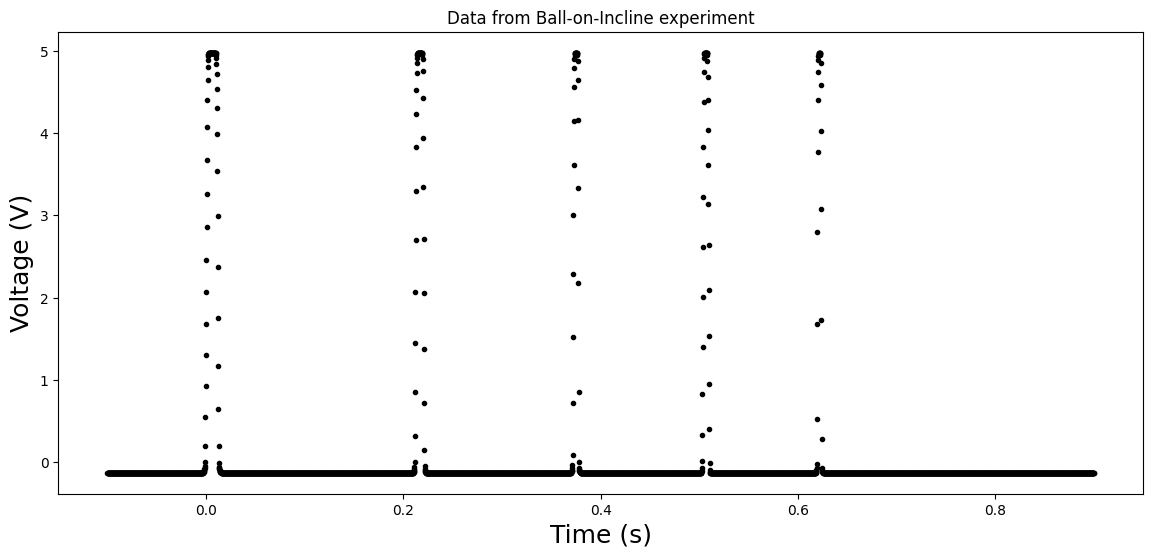

In [6]:
# Read the data and plot it (possibly with passing times in):
filename = 'ball7_8mm_example.csv'

time, voltage = read_csv(filename, 13)
timepass, timepass_sig = find_midpoints(time, voltage)

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(time, voltage, 'k.', label='Measurements')
ax.set_title("Data from Ball-on-Incline experiment")
ax.set_xlabel("Time (s)", fontsize=18)
ax.set_ylabel("Voltage (V)", fontsize=18)

# What to do next?

From the V(t) data you should be able to determine five times at which the ball passed. Discuss in the group how to do this best, and possibly test it by seeing if the result is "invariant" between different data sets.

Note that getting an uncertainty can be hard, and think about the relevance of such an uncertainty, which should anyway be rather small.